<a href="https://colab.research.google.com/github/WMinerva292/WMinerva292/blob/main/CapstoneProjectCovid19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Capstone Project: Covid-19**
## **Analyzing the trends of Covid-19 with Python**

### **Problem Statement:**

Given data about COVID-19 patients, write code to visualize the impact and
analyze the trend of rate of infection and recovery as well as make predictions
about the number of cases expected a week in future based on the current
trends.

### **Dataset:**

CSV and Excel files containing data about the number of COVID-19 confirmed
deaths and recovered patients both around the world and in India. Download Link

### **Guidelines:**

● Use pandas to accumulate data from multiple data files.

● Use plotly (visualization library) to create interactive visualizations.

● Use Facebook prophet library to make time series models.

● Visualize the prediction by combining these technologies.

## **Step 1: Importing the Libraries**

In [24]:
# Import the Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import plotly.express as px

## **Step 2: Importing the Dataset**

In [25]:
df = pd.read_csv('/content/covid_19_clean_complete.csv')

## **Step 3: Data Inspection**

In [26]:
df.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Afghanistan,33.93911,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.15330,20.168300,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.03390,1.659600,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.50630,1.521800,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.20270,17.873900,2020-01-22,0,0,0,0,Africa


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49068 entries, 0 to 49067
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Province/State  14664 non-null  object 
 1   Country/Region  49068 non-null  object 
 2   Lat             49068 non-null  float64
 3   Long            49068 non-null  float64
 4   Date            49068 non-null  object 
 5   Confirmed       49068 non-null  int64  
 6   Deaths          49068 non-null  int64  
 7   Recovered       49068 non-null  int64  
 8   Active          49068 non-null  int64  
 9   WHO Region      49068 non-null  object 
dtypes: float64(2), int64(4), object(4)
memory usage: 3.7+ MB


In [28]:
df.describe()

,Lat,Long,Confirmed,Deaths,Recovered,Active
count,49068.000000,49068.000000,4.906800e+04,49068.000000,4.906800e+04,4.906800e+04
mean,21.433730,23.528236,1.688490e+04,884.179160,7.915713e+03,8.085012e+03
std,24.950320,70.442740,1.273002e+05,6313.584411,5.480092e+04,7.625890e+04
min,-51.796300,-135.000000,0.000000e+00,0.000000,0.000000e+00,-1.400000e+01
25%,7.873054,-15.310100,4.000000e+00,0.000000,0.000000e+00,0.000000e+00
50%,23.634500,21.745300,1.680000e+02,2.000000,2.900000e+01,2.600000e+01
75%,41.204380,80.771797,1.518250e+03,30.000000,6.660000e+02,6.060000e+02
max,71.706900,178.065000,4.290259e+06,148011.000000,1.846641e+06,2.816444e+06


**Province/State column should be dropped since it contain NaN mostly.**

In [29]:
df.tail()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
49063,NaN,Sao Tome and Principe,0.186400,6.613100,2020-07-27,865,14,734,117,Africa
49064,NaN,Yemen,15.552727,48.516388,2020-07-27,1691,483,833,375,Eastern Mediterranean
49065,NaN,Comoros,-11.645500,43.333300,2020-07-27,354,7,328,19,Africa
49066,NaN,Tajikistan,38.861000,71.276100,2020-07-27,7235,60,6028,1147,Europe
49067,NaN,Lesotho,-29.610000,28.233600,2020-07-27,505,12,128,365,Africa


In [30]:
df = df.drop("Province/State", axis = 1)

In [31]:
df.head()

,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,Afghanistan,33.93911,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,Albania,41.15330,20.168300,2020-01-22,0,0,0,0,Europe
2,Algeria,28.03390,1.659600,2020-01-22,0,0,0,0,Africa
3,Andorra,42.50630,1.521800,2020-01-22,0,0,0,0,Europe
4,Angola,-11.20270,17.873900,2020-01-22,0,0,0,0,Africa


**Shape Inspection**

In [32]:
print("Number of rows: ", df.shape[0])
print("Number of columns: ", df.shape[1])

Number of rows:  49068
Number of columns:  9


**At the end of the dataset, when the last record was taken, what was the current or latest values for the record.**

We are trying to find the last date, when the data was taken or collected. And we are trying to compare the difference or changes we have seen as compared to intial data.

In [33]:
top = df[df["Date"] == df["Date"].max()]

In [34]:
top

,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
48807,Afghanistan,33.939110,67.709953,2020-07-27,36263,1269,25198,9796,Eastern Mediterranean
48808,Albania,41.153300,20.168300,2020-07-27,4880,144,2745,1991,Europe
48809,Algeria,28.033900,1.659600,2020-07-27,27973,1163,18837,7973,Africa
48810,Andorra,42.506300,1.521800,2020-07-27,907,52,803,52,Europe
48811,Angola,-11.202700,17.873900,2020-07-27,950,41,242,667,Africa
...,...,...,...,...,...,...,...,...,...
49063,Sao Tome and Principe,0.186400,6.613100,2020-07-27,865,14,734,117,Africa
49064,Yemen,15.552727,48.516388,2020-07-27,1691,483,833,375,Eastern Mediterranean
49065,Comoros,-11.645500,43.333300,2020-07-27,354,7,328,19,Africa
49066,Tajikistan,38.861000,71.276100,2020-07-27,7235,60,6028,1147,Europe


**We should have the data based on the Country/Region.**

In [49]:
data = df.groupby("Country/Region")[["Confirmed", "Deaths","Active"]].sum().reset_index()

In [50]:
data.head()

,Country/Region,Confirmed,Deaths,Active
0,Afghanistan,1936390,49098,1089052
1,Albania,196702,5708,72117
2,Algeria,1179755,77972,345886
3,Andorra,94404,5423,19907
4,Angola,22662,1078,15011


In [51]:
# Lets find out the data of India
data[data["Country/Region"] == "India"]

,Country/Region,Confirmed,Deaths,Active
79,India,40883464,1111831,15987913


In [60]:
fig = px.choropleth(
    data,
    locations = "Country/Region", # Column from which the reference has been taken
    locationmode = "country names", # Show the country names
    color = "Active", # Which column we consider while plotting
    hover_name = "Country/Region", #
    range_color = [1, 1000000],
    color_continuous_scale = "peach"
)

In [61]:
fig.show()

**Visualize all the confirmed cases.**

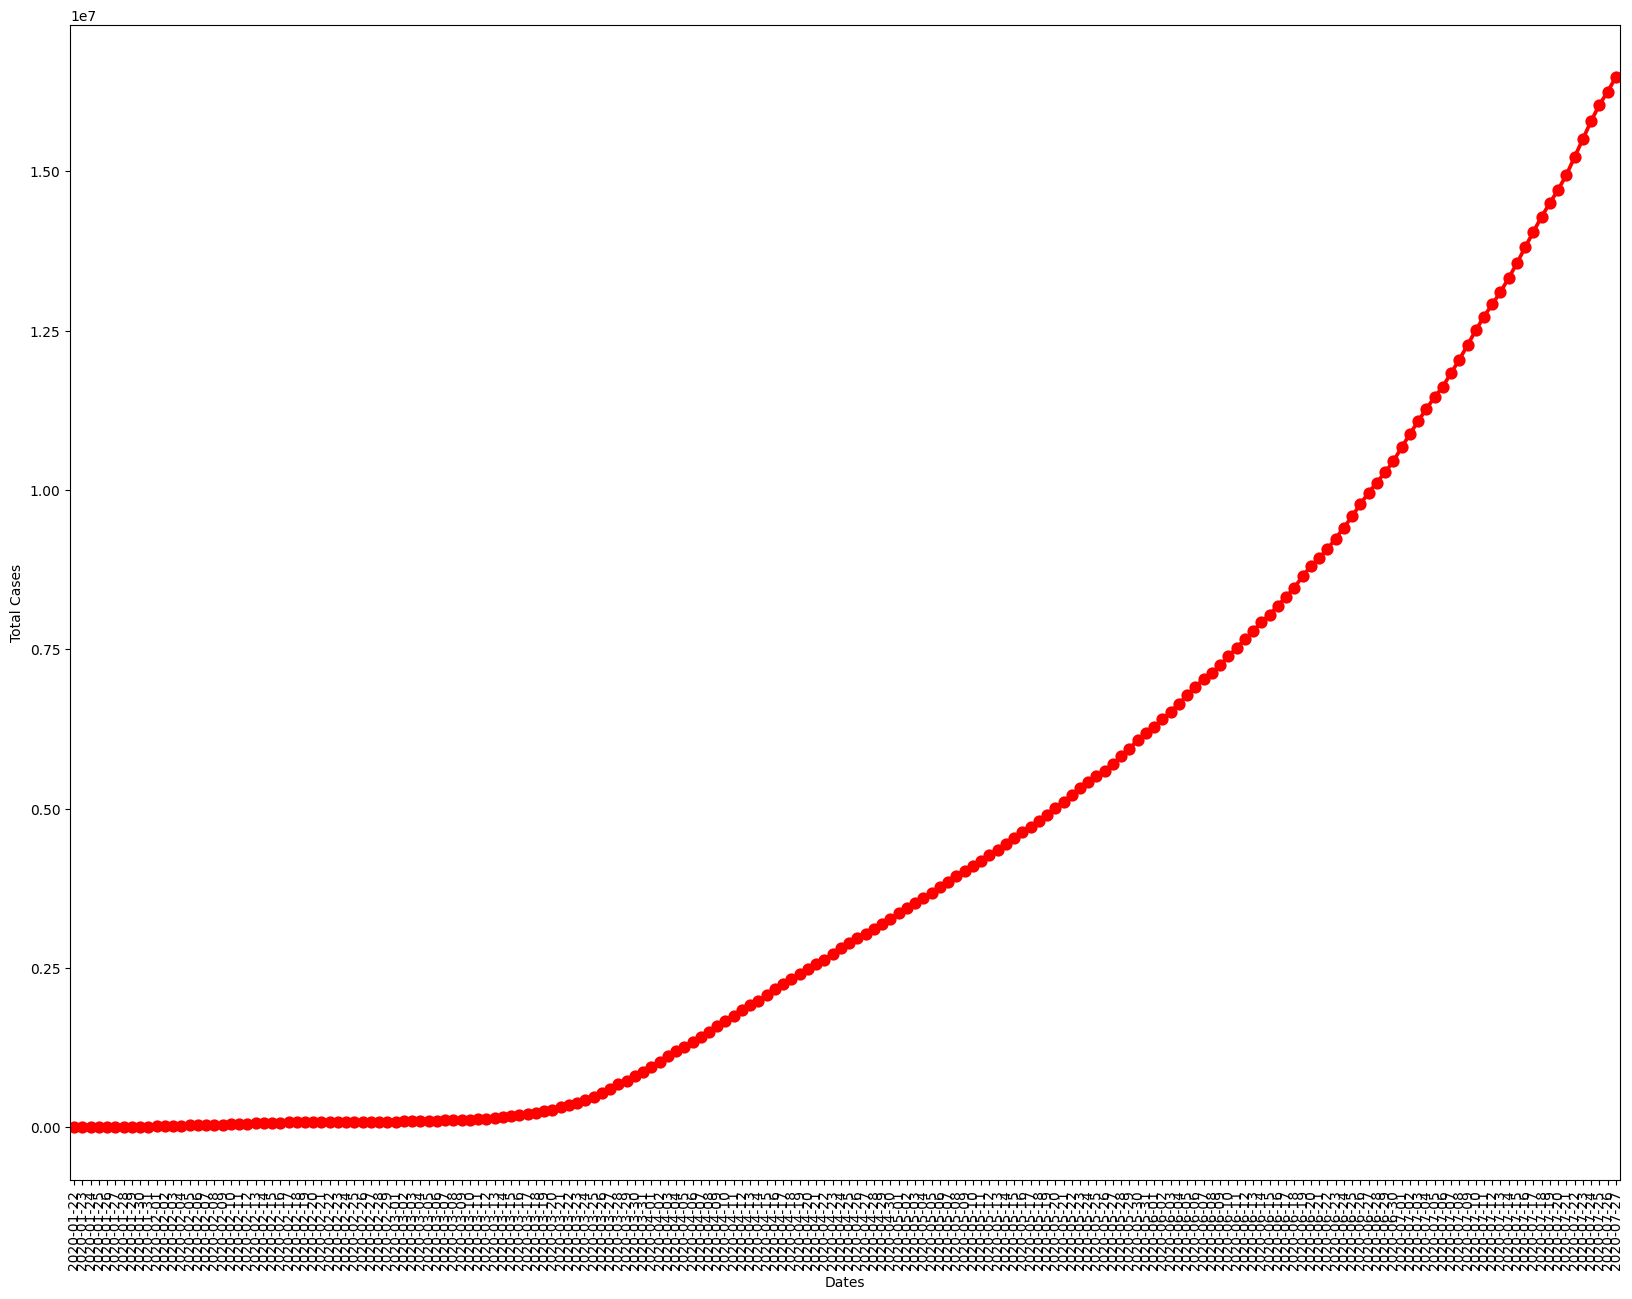

In [62]:
plt.figure(figsize = (20, 15))

# Find the confirmed cases firtly
confirm_cases = df.groupby('date')['Confirmed'].sum().reset_index()

# We will convert this date column date-time
confirm_cases["Date"] = pd.to_datetime(confirm_cases["Date"])

# Create the plot here
a = sns.pointplot(
    x = confirm_cases.Date.dt.date,
    y = confirm_cases.Confirmed,
    color = "r"
)

a.set(xlabel = "Dates", ylabel = "Total Cases")

plt.xticks(rotation = 90)
plt.show()

<Figure size 2000x1500 with 0 Axes>

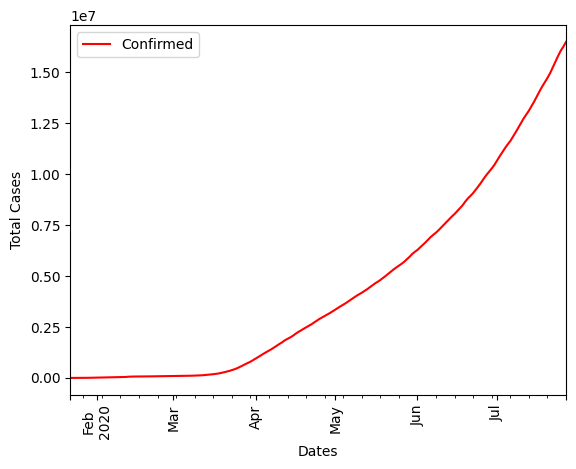

In [63]:
plt.figure(figsize = (20, 15))

# Find the confirmed cases firtly
confirm_cases = df.groupby('Date')['Confirmed'].sum().reset_index()

# We will convert this date column date-time
confirm_cases["Date"] = pd.to_datetime(confirm_cases["Date"])

# Create the plot here
confirm_cases = confirm_cases.set_index("Date")

a = confirm_cases.plot(kind = "line", color = "r")

a.set(xlabel = "Dates", ylabel = "Total Cases")

plt.xticks(rotation = 90)
plt.show()

In [64]:
confirm_cases.head()

,Confirmed
Date,
2020-01-22,555
2020-01-23,654
2020-01-24,941
2020-01-25,1434
2020-01-26,2118


## **Step 4: Forecasting using Prophet**

In [65]:
!pip install prophet

In [67]:
from prophet import Prophet

In [68]:
df.head()

,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,Afghanistan,33.93911,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,Albania,41.15330,20.168300,2020-01-22,0,0,0,0,Europe
2,Algeria,28.03390,1.659600,2020-01-22,0,0,0,0,Africa
3,Andorra,42.50630,1.521800,2020-01-22,0,0,0,0,Europe
4,Angola,-11.20270,17.873900,2020-01-22,0,0,0,0,Africa


**Collected based on Date.**

In [69]:
df.groupby("Date").sum().head()

,Country/Region,Lat,Long,Confirmed,Deaths,Recovered,Active,WHO Region
Date,,,,,,,,
2020-01-22,AfghanistanAlbaniaAlgeriaAndorraAngolaAntigua ...,5594.20365,6140.869714,555,17,28,510,Eastern MediterraneanEuropeAfricaEuropeAfricaA...
2020-01-23,AfghanistanAlbaniaAlgeriaAndorraAngolaAntigua ...,5594.20365,6140.869714,654,18,30,606,Eastern MediterraneanEuropeAfricaEuropeAfricaA...
2020-01-24,AfghanistanAlbaniaAlgeriaAndorraAngolaAntigua ...,5594.20365,6140.869714,941,26,36,879,Eastern MediterraneanEuropeAfricaEuropeAfricaA...
2020-01-25,AfghanistanAlbaniaAlgeriaAndorraAngolaAntigua ...,5594.20365,6140.869714,1434,42,39,1353,Eastern MediterraneanEuropeAfricaEuropeAfricaA...
2020-01-26,AfghanistanAlbaniaAlgeriaAndorraAngolaAntigua ...,5594.20365,6140.869714,2118,56,52,2010,Eastern MediterraneanEuropeAfricaEuropeAfricaA...


In [70]:
total_active_cases = df["Active"].sum()

In [71]:
print('Total number of active cases around the world: ', total_active_cases)

Total number of active cases around the world:  396715350


**Creating the data for confirmed, recoverd and deaths**

In [72]:
confirmed = df.groupby("Date").sum()["Confirmed"].reset_index()
deaths = df.groupby("Date").sum()["Deaths"].reset_index()
recovered = df.groupby("Date").sum()["Recovered"].reset_index()

In [73]:
confirmed.head()

,Date,Confirmed
0,2020-01-22,555
1,2020-01-23,654
2,2020-01-24,941
3,2020-01-25,1434
4,2020-01-26,2118


In [86]:
deaths

,Date,Deaths
0,2020-01-22,17
1,2020-01-23,18
2,2020-01-24,26
3,2020-01-25,42
4,2020-01-26,56
...,...,...
183,2020-07-23,633506
184,2020-07-24,639650
185,2020-07-25,644517
186,2020-07-26,648621


In [87]:
recovered

,Date,Recovered
0,2020-01-22,28
1,2020-01-23,30
2,2020-01-24,36
3,2020-01-25,39
4,2020-01-26,52
...,...,...
183,2020-07-23,8710969
184,2020-07-24,8939705
185,2020-07-25,9158743
186,2020-07-26,9293464


In [74]:
confirmed.to_csv("confirmed.csv")

**Forecast for confirmed cases using Prophet**

In [75]:
confirmed.columns = ["ds", "y"] # making the date (ds) and target (y)

In [76]:
confirmed["ds"] = pd.to_datetime(confirmed["ds"])

In [77]:
confirmed.head()

,ds,y
0,2020-01-22,555
1,2020-01-23,654
2,2020-01-24,941
3,2020-01-25,1434
4,2020-01-26,2118


In [78]:
model = Prophet()

In [79]:
model.fit(confirmed)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp64mc9eli/ddl7ohev.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp64mc9eli/x3eh1cds.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=45873', 'data', 'file=/tmp/tmp64mc9eli/ddl7ohev.json', 'init=/tmp/tmp64mc9eli/x3eh1cds.json', 'output', 'file=/tmp/tmp64mc9eli/prophet_modeldi51cgjl/prophet_model-20241230111234.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:12:34 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
11:12:34 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [101]:
future = model.make_future_dataframe(periods = 7)

In [102]:
future

,ds
0,2020-01-22
1,2020-01-23
2,2020-01-24
3,2020-01-25
4,2020-01-26
...,...
190,2020-07-30
191,2020-07-31
192,2020-08-01
193,2020-08-02


In [103]:
forecast = model.predict(future)

In [104]:
forecast[["ds", "yhat"]]

,ds,yhat
0,2020-01-22,-1.844211e+04
1,2020-01-23,-1.118185e+04
2,2020-01-24,-5.175679e+03
3,2020-01-25,-4.075673e+02
4,2020-01-26,-9.825667e+03
...,...,...
190,2020-07-30,9.595783e+06
191,2020-07-31,9.737182e+06
192,2020-08-01,9.877343e+06
193,2020-08-02,1.000332e+07


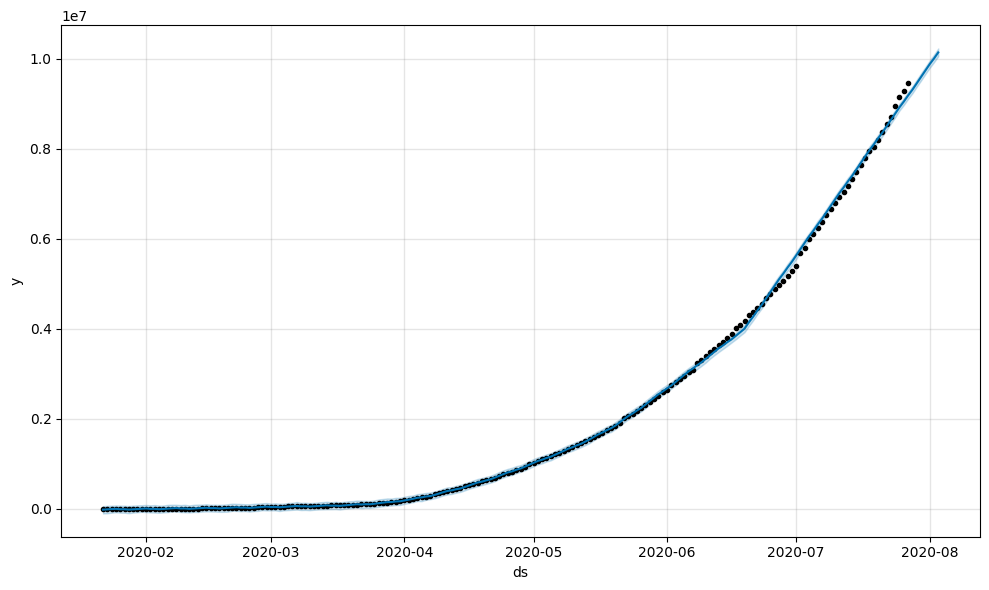

In [105]:
confirmed_plot = model.plot(forecast)

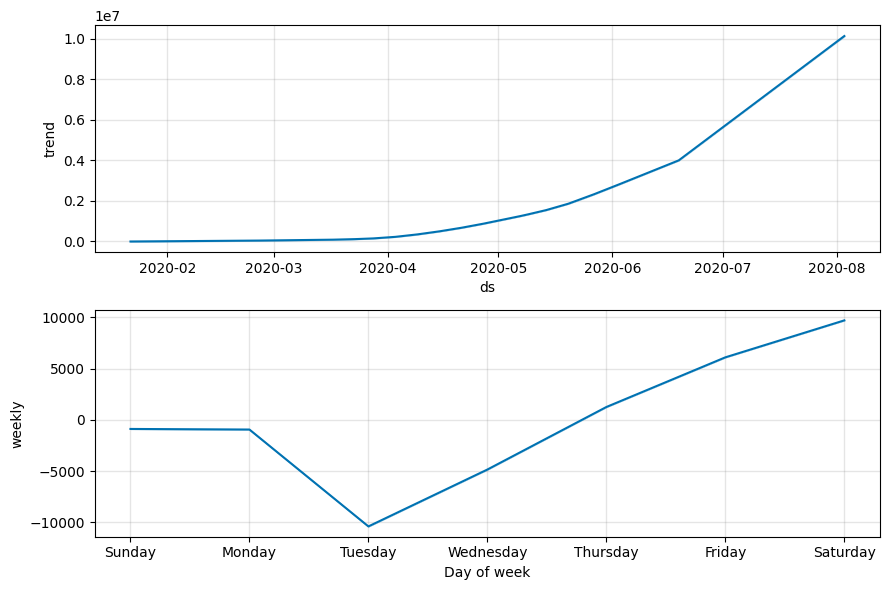

In [106]:
confirm_plt_components = model.plot_components(forecast)

**Forecast for recovered cases using Prophet.**

In [88]:
recovered

,Date,Recovered
0,2020-01-22,28
1,2020-01-23,30
2,2020-01-24,36
3,2020-01-25,39
4,2020-01-26,52
...,...,...
183,2020-07-23,8710969
184,2020-07-24,8939705
185,2020-07-25,9158743
186,2020-07-26,9293464


In [89]:
recovered.to_csv("recovered.csv")

In [90]:
recovered.columns = ["ds", "y"]

In [91]:
recovered["ds"]=pd.to_datetime(recovered["ds"])

In [92]:
recovered

,ds,y
0,2020-01-22,28
1,2020-01-23,30
2,2020-01-24,36
3,2020-01-25,39
4,2020-01-26,52
...,...,...
183,2020-07-23,8710969
184,2020-07-24,8939705
185,2020-07-25,9158743
186,2020-07-26,9293464


In [93]:
model = Prophet()

In [94]:
model.fit(recovered)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp64mc9eli/7xreu3dt.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp64mc9eli/ak1xlpt9.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=97437', 'data', 'file=/tmp/tmp64mc9eli/7xreu3dt.json', 'init=/tmp/tmp64mc9eli/ak1xlpt9.json', 'output', 'file=/tmp/tmp64mc9eli/prophet_modelo2_hftpk/prophet_model-20241230120335.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:03:35 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:03:36 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [95]:
future = model.make_future_dataframe(periods = 7)

In [96]:
future

,ds
0,2020-01-22
1,2020-01-23
2,2020-01-24
3,2020-01-25
4,2020-01-26
...,...
190,2020-07-30
191,2020-07-31
192,2020-08-01
193,2020-08-02


In [97]:
forecast = model.predict(future)

In [98]:
forecast[["ds", "yhat"]]

,ds,yhat
0,2020-01-22,-1.844211e+04
1,2020-01-23,-1.118185e+04
2,2020-01-24,-5.175679e+03
3,2020-01-25,-4.075673e+02
4,2020-01-26,-9.825667e+03
...,...,...
190,2020-07-30,9.595783e+06
191,2020-07-31,9.737182e+06
192,2020-08-01,9.877343e+06
193,2020-08-02,1.000332e+07


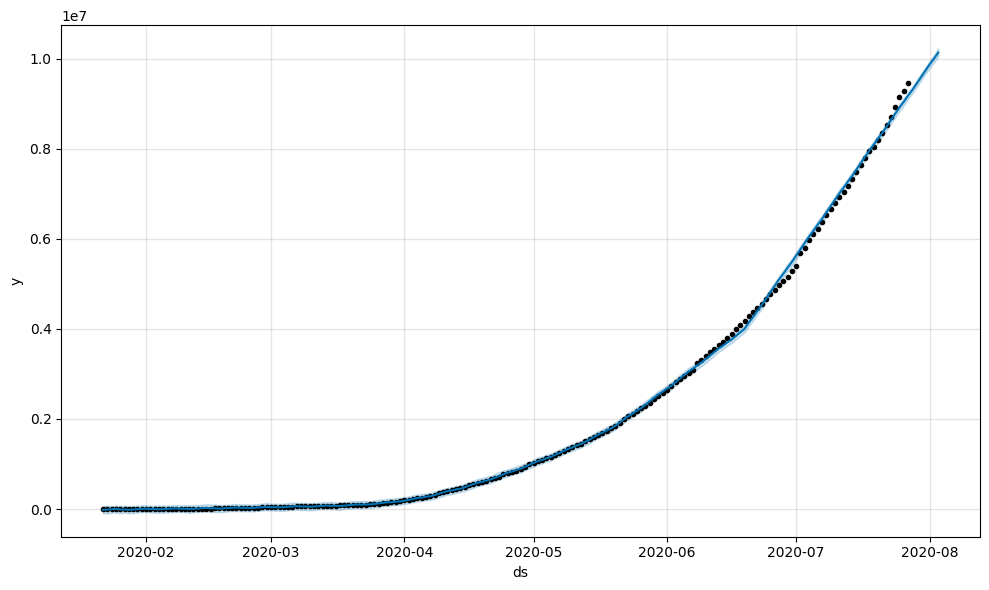

In [99]:
recovered_plot = model.plot(forecast)

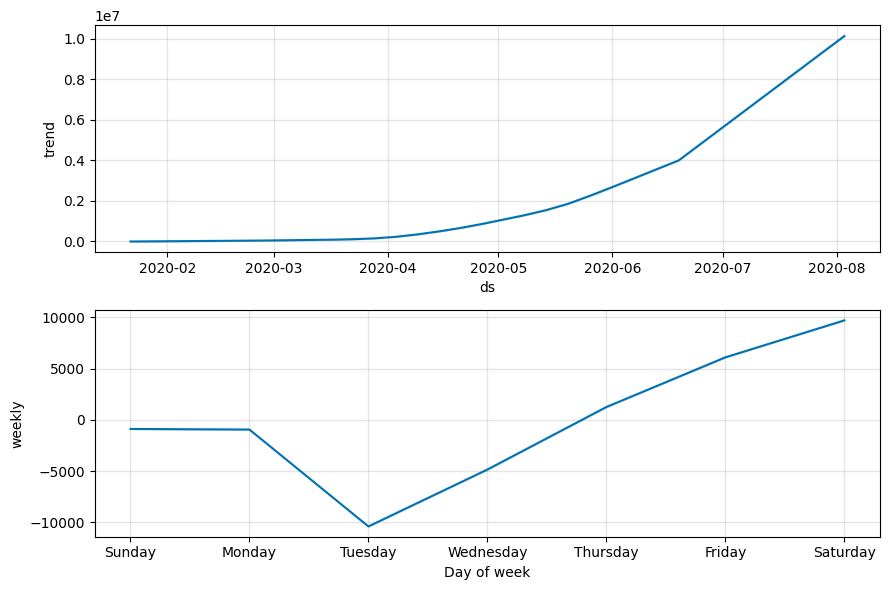

In [100]:
recover_plt_components = model.plot_components(forecast)